# Assignment 1B: Text Analysis

In the dataset about COVID-19 Vaccine Trust Annotations, a trust-annotated corpus of Human-chatbot conversations about COVID-19 callad VIRATrustData is used. The dataset has the following structure:
Each of the 3 dataset files contains the following columns:

I. 	text - user side input taken from VIRA Dialogs.
II.	label - trust label:
	
	0 - Low Institutional Trust
	1 - Low Agent Trust
	2 - Neutral
	3 - High Trust 

In this text analysis, a sentiment analysis will be conducted on the dataset and then be used to compare with the trust labels provided by the The COVID-19 Vaccine Trust Annotations dataset. 

## Step 1: 
Loading the data and performing preliminary data inspection

**1.1 Import libraries and moduls**

In [1]:
import pandas as pd # Data manipulation
import numpy as np # Numerical computation
import matplotlib.pyplot as plt # Data visualisation
import seaborn as sns # Statistical data visualisation
import nltk # Natural language processing tasks

**1.2 Read the data from CSV file and merge the datasets**

Use the input csv file and store it as a Python dataframe in order to read the data.
The dataset is saved locally and the read_csv() function from the Pandas library will be used.

In [2]:
dev = pd.read_csv(r"C:\Users\ans_b\Downloads\AT1B Datasets\IBM_Debater_(R)_trust_data\data\dev.csv")
test = pd.read_csv(r"C:\Users\ans_b\Downloads\AT1B Datasets\IBM_Debater_(R)_trust_data\data\test.csv")
train = pd.read_csv(r"C:\Users\ans_b\Downloads\AT1B Datasets\IBM_Debater_(R)_trust_data\data\train.csv")

#Merge the datasets to one big dataset using pd.concat so we can extract more insights and features
# Ignore_index=True will ignore the current index values of the datasets and generate a new index for our dataframe
df = df = pd.concat([dev, test, train], ignore_index=True)

**1.3 Preliminary data inspection**

Goal is to get an quick overview of the data and check for any mistakes such as null values and duplicates

In [3]:
# Use df.info to get general information about the Dataframe, checking the index types, null values and column names
df.info()
# Check the first 5 rows of the data to get a sense of it
print(df.head(10))
# Check random sample of rows for the same reason
print(df.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3022 entries, 0 to 3021
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3022 non-null   object
 1   label   3022 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.3+ KB
                                                text  label
0  Are the vaccines causing heart conditions in t...      0
1                         What are long term effects      0
2  does the moderna shot cause protein in your urine      0
3                        Does vqccine melt my organs      0
4  Will the vaccine kill everyone who takes the v...      0
5        my dad had a heart attack after the vaccine      0
6  What are the long time side effects of the Cov...      0
7                        Is the vaccine a microchip?      0
8  What is the estimated spontaneous abortion rat...      0
9                 What is the adverse reaction rate?      0
                                       

In [4]:
# Check dataset for duplicate rows, we have zero
df.duplicated().sum()

0

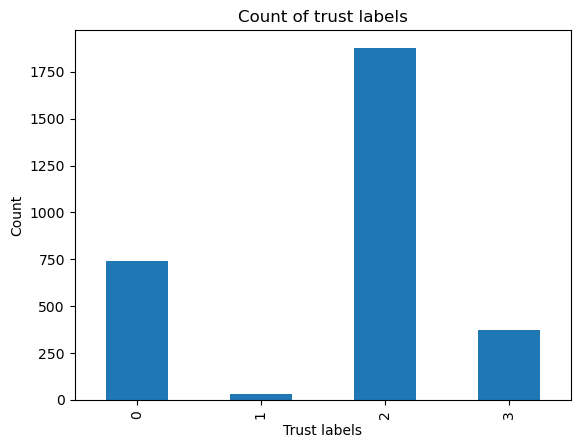

In [5]:
# Get an overview of the distribution of of the trust labels in the label column by using a bar plot sorted by index numbers
df['label'].value_counts().sort_index().plot(kind='bar', title="Count of trust labels")

plt.xlabel("Trust labels")
plt.ylabel('Count')
plt.show()

**Key insights from Step 1**

Total of 2 rows and 3022 columns. 
Label is a numerical column with only integers.
There are no null values or duplicates in the Dataframe, indicating that it is a very clean dataset
Majority of the data consist of neutral trust labels and very few low agent trust. 

## Step 2: 

Sentiment analysing with Natural Language Toolkit (NLTK).
Using VADER SentimentIntensityAnalyzer to get the sentiment score of the text column, scoring it by negative/neutural/postitive.
Benefit of using the VADER (Valence Aware Dictionary and Sentiment Reasoner) is that it uses a lexicon of words and produces a sentiment score of a text. The rule-based and lexion model VADER is context-aware because it takes into account the contextual clues and order of words which can affect the sentiment of the text. 

**2.1 Import and initiate the SentimentIntensitAnalyzer**

In [6]:

nltk.download('vader_lexicon') # Lexicon used for the sentiment analysis
from nltk.sentiment import SentimentIntensityAnalyzer # Module for NLP sentiment analysis
from tqdm.notebook import tqdm # Shows progress bar for loops 

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ans_b\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


**2.2 Run and merge polarity score on the Dataframe**

In [7]:
# Create a new column based on index numbers+1 that will be used to merge the datasets on
df.insert(0, 'ID', df.index+1) 
# Create empty dictionary to store polarity scores
polarity = {}
# Initiate a for loop to run the polarity score on the dataset in it's entirety
for index, variable in tqdm(df.iterrows(), total=len(df)):
    text = variable['text']
    ID = variable['ID']
    polarity[ID] = sia.polarity_scores(text)
    
df

  0%|          | 0/3022 [00:00<?, ?it/s]

,ID,text,label
0,1,Are the vaccines causing heart conditions in t...,0
1,2,What are long term effects,0
2,3,does the moderna shot cause protein in your urine,0
3,4,Does vqccine melt my organs,0
4,5,Will the vaccine kill everyone who takes the v...,0
...,...,...,...
3017,3018,Can I get the Pfizer vaccine if I have already...,3
3018,3019,I'm a senior citizen. Can I get the Pfizer boo...,3
3019,3020,"Ok, that's fair. But what if I want the best c...",3
3020,3021,How long after infection should I get second dose,3


In [8]:
VADER = pd.DataFrame(polarity).T # Make new DF from the polarity dictionary
VADER = VADER.reset_index().rename(columns={'index': 'ID'}) # Reset current index of our new DF and rename index to ID
VADER = VADER.merge(df, how='left', on = 'ID') # Merge the new VADER DF with the DF from step 1 using the ID column 
# left join ensures we retain all rows from VADER and add matching rows from df to the merged DF
VADER

,ID,neg,neu,pos,compound,text,label
0,1,0.00,1.000,0.000,0.0000,Are the vaccines causing heart conditions in t...,0
1,2,0.00,1.000,0.000,0.0000,What are long term effects,0
2,3,0.00,1.000,0.000,0.0000,does the moderna shot cause protein in your urine,0
3,4,0.00,1.000,0.000,0.0000,Does vqccine melt my organs,0
4,5,0.37,0.630,0.000,-0.6908,Will the vaccine kill everyone who takes the v...,0
...,...,...,...,...,...,...,...
3017,3018,0.00,1.000,0.000,0.0000,Can I get the Pfizer vaccine if I have already...,3
3018,3019,0.00,0.894,0.106,0.3818,I'm a senior citizen. Can I get the Pfizer boo...,3
3019,3020,0.03,0.387,0.583,0.9698,"Ok, that's fair. But what if I want the best c...",3
3020,3021,0.00,1.000,0.000,0.0000,How long after infection should I get second dose,3


**2.3 Conducting Sentiment analsys using VADER**

In order to proceed witht the analysis, a crucial assumption will be made regarding the 'label' column. A High Trust label with the score 3 is gonna be more linguistically positive and a Low Institutional Trust with the score 0 is gonna have more negative connotation than the High Trust one. 

label
0   -0.135864
1   -0.110642
2    0.043514
3    0.074803
Name: compound, dtype: float64


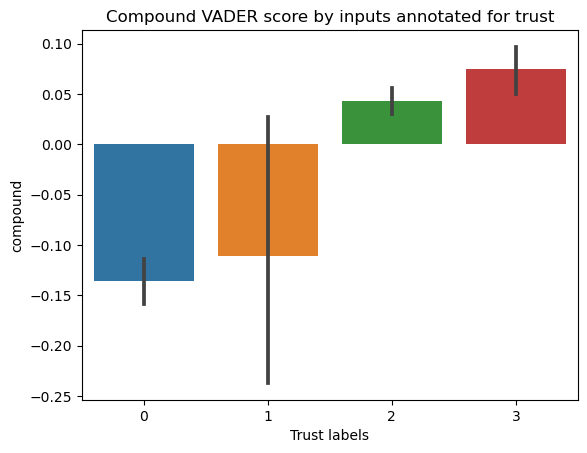

In [9]:
# Calculate the mean compound polarity score for each label category
print(VADER.groupby('label').compound.mean())
# Make a visualisation of the label column and sentiment score from VADER. 
sns.barplot(data = VADER, x = 'label', y = 'compound') # Bar charts are ideal for comparing categorical data against numerical
plt.title('Compound VADER score by inputs annotated for trust')
plt.xlabel('Trust labels')
plt.show()

Breaking down the results even further by looking at the negative, neutral and positive VADER score 

            neg       neu       pos
label                              
0      0.131277  0.835618  0.033101
1      0.171774  0.748290  0.079968
2      0.049773  0.862379  0.087847
3      0.009629  0.927051  0.063325


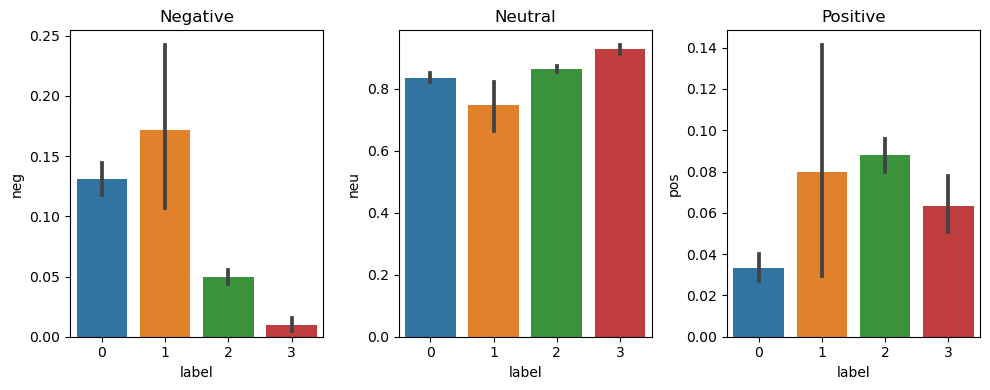

In [10]:
# Make a table that groups the data by label and calculate means for each SCORE
label_means = VADER.groupby('label').agg({'neg': 'mean', 'neu': 'mean', 'pos': 'mean'})

print(label_means) # display the means in a table format


fig = plt.figure(figsize=(10, 4)) #Deciding the figure size for width x height

# Creating subfigures within the figured defined above for each emotional tone
sub1 = fig.add_subplot(1, 3, 1) 
sns.barplot(data=VADER, x='label', y='neg', ax=sub1)
sub1.set_title('Negative')

sub2 = fig.add_subplot(1, 3, 2)
sns.barplot(data=VADER, x='label', y='neu', ax=sub2)
sub2.set_title('Neutral')

sub3 = fig.add_subplot(1, 3, 3)
sns.barplot(data=VADER, x='label', y='pos', ax=sub3)
sub3.set_title('Positive')

plt.tight_layout() # Fits all sub models without overlapping them
plt.show()


**Key insights from Step 2**

Interpreting the VADER sentiment analysis from the calculations:
Compound results scale from -1 (extremely negative sentiment) to +1 (Extremely positive sentiment)
        
        Trust label 0 (Low Institutional Trust) - Score: -0.136 - On average, this category has a negative sentiment
        
        Trust label 1 (Low Agent Trust) - Score: -0.110642 - On average, also negative sentiment but less than label 0
        
        Trust label 2 (Neutral) - Score: 0.043514 - On average, ever so slightly positive sentiment
        
        Trust label 3 (High trust) - Score: 0.074803 - On average, adequately positive sentiment 
        
Looking at the compound score, there are is a indication of a weak correlation between the trust labels and the VADER sentiment analysis. 

However by digging deeper into the results for the negative, neutral and positive score, we get a clearer picture.

    Negative: Most of the negativity is skewed towards the lower trust categories but the majority falls into Trust label 1

    Neutrual: High rate of neutrual sentiment in all categories, aligns with results from Step 1.3 where trust label 2 was   the most populated

    Positive: Slightly skewed towards the higher trust labels but majority of the positive sentiment can be seen in trust   label 1 and 2. 

## Step 3:

in this step the aim is to use RoBERTa to perform another sentiment analysis and compare result to the VADER approach.

VADER uses a rule-based algorithm that is based on a sentiment lexicon and therefore uses predefined rules to predict the sentiment of texts. Language is complex and full of figurative forms such as irony and sarcasm, which VADER do not perform as well on and therefore using this approach can lead to inaccuracies.  

RoBERTa is a transformer-based language model that uses self-attention to process input sequences and generate contextualized representations of words in a sentence. RoBERTa is pre-trained on a large amount of text data from various sources so it is able to perform well on even complex and nuanced language. 

So summerized, RoBERTa is better suited to learn the semantics of natural language in comparison to the rule-based system VADER. 

**Step 3.1 Importing relevant libraries and initiating model**

In [11]:
from transformers import AutoTokenizer # Used to tokenize text data for machine learning models.
from transformers import AutoModelForSequenceClassification # Pre-trained machine learning model for classification
from scipy.special import softmax # Used to convert predictions from models into probability

In [12]:
tweet_model = f"cardiffnlp/twitter-roberta-base-sentiment" # load roBERTa based model trained on 58M tweets as string
pre_tokenizer = AutoTokenizer.from_pretrained(tweet_model) # Loads tokenizer from pre-trained model and use the tweet variable
model = AutoModelForSequenceClassification.from_pretrained(tweet_model) # Loads pre-trained sentiment analysis model

**3.2 Conducting Sentiment analsys using roBERTa**

Same assumption as in step 2.3. In order to proceed witht the analysis, a crucial assumption will be made regarding the 'label' column. A High Trust label with the score 3 is gonna be more linguistically positive and a Low Institutional Trust with the score 0 is gonna have more negative connotation than the High Trust one

In [13]:
# Defining function that will take text data as input and return a dictonary containing sentiment scores.
def roBERTa_polarity_scores(x):
    text_encoded = pre_tokenizer(x, return_tensors='pt') # Encoding pre_tokenizer as a tensor
    output = model(**text_encoded) # Pass dictionary pairs as keyword arguments to models, output of processed input text data
    scores = output[0][0].detach().numpy() # Numpy array that will contain the sentiment scores for the 3 categories
    scores = softmax(scores) # Softmax will convert the scores into a normalized probability distribution
    scores_dict = {
        'roBERTa_neg' : scores[0],
        'roBERTa_neu' : scores[1],
        'roBERTa_pos' : scores[2]
    }
    return scores_dict

In [30]:
polarity = {}
# Similar to code in Step 2.2 but extended to store the results from VADER and roBERTA and combine the results to 1 dict.
for index, variable in tqdm(df.iterrows(), total=len(df)):
        text = variable['text']
        ID = variable['ID']
        VADER_result = sia.polarity_scores(text)
        VADER_result_rename = {} 
        for key, value in VADER_result.items():
            VADER_result_rename[f"VADER_{key}"] = value # Re-named previous names to include VADER in the beginning
        roBERTa_result = roBERTa_polarity_scores(text)
        combined = {**VADER_result_rename, **roBERTa_result}
        polarity[ID] = combined

  0%|          | 0/3022 [00:00<?, ?it/s]

In [36]:
# Same procedure as in Step 2.2 - Made new df with the results including both VADER and roBERTa
df_result = pd.DataFrame(polarity).T
df_result = df_result.reset_index().rename(columns={'index': 'ID'})
df_result = df_result.merge(df, how='left')

df_result

,ID,VADER_neg,VADER_neu,VADER_pos,VADER_compound,roBERTa_neg,roBERTa_neu,roBERTa_pos,text,label
0,1,0.00,1.000,0.000,0.0000,0.804037,0.191186,0.004777,Are the vaccines causing heart conditions in t...,0
1,2,0.00,1.000,0.000,0.0000,0.141772,0.824316,0.033912,What are long term effects,0
2,3,0.00,1.000,0.000,0.0000,0.596200,0.395948,0.007852,does the moderna shot cause protein in your urine,0
3,4,0.00,1.000,0.000,0.0000,0.848980,0.142886,0.008134,Does vqccine melt my organs,0
4,5,0.37,0.630,0.000,-0.6908,0.765296,0.226171,0.008532,Will the vaccine kill everyone who takes the v...,0
...,...,...,...,...,...,...,...,...,...,...
3017,3018,0.00,1.000,0.000,0.0000,0.137437,0.816722,0.045841,Can I get the Pfizer vaccine if I have already...,3
3018,3019,0.00,0.894,0.106,0.3818,0.102380,0.813842,0.083778,I'm a senior citizen. Can I get the Pfizer boo...,3
3019,3020,0.03,0.387,0.583,0.9698,0.104938,0.764094,0.130968,"Ok, that's fair. But what if I want the best c...",3
3020,3021,0.00,1.000,0.000,0.0000,0.154652,0.826862,0.018485,How long after infection should I get second dose,3


**Step 3.3 Score comparison between models**

       VADER_neg  VADER_neu  VADER_pos
label                                 
0       0.131277   0.835618   0.033101
1       0.171774   0.748290   0.079968
2       0.049773   0.862379   0.087847
3       0.009629   0.927051   0.063325
       roBERTa_neg  roBERTa_neu  roBERTa_pos
label                                       
0         0.551611     0.429136     0.019253
1         0.628695     0.347337     0.023968
2         0.269536     0.666417     0.064047
3         0.208995     0.732130     0.058874


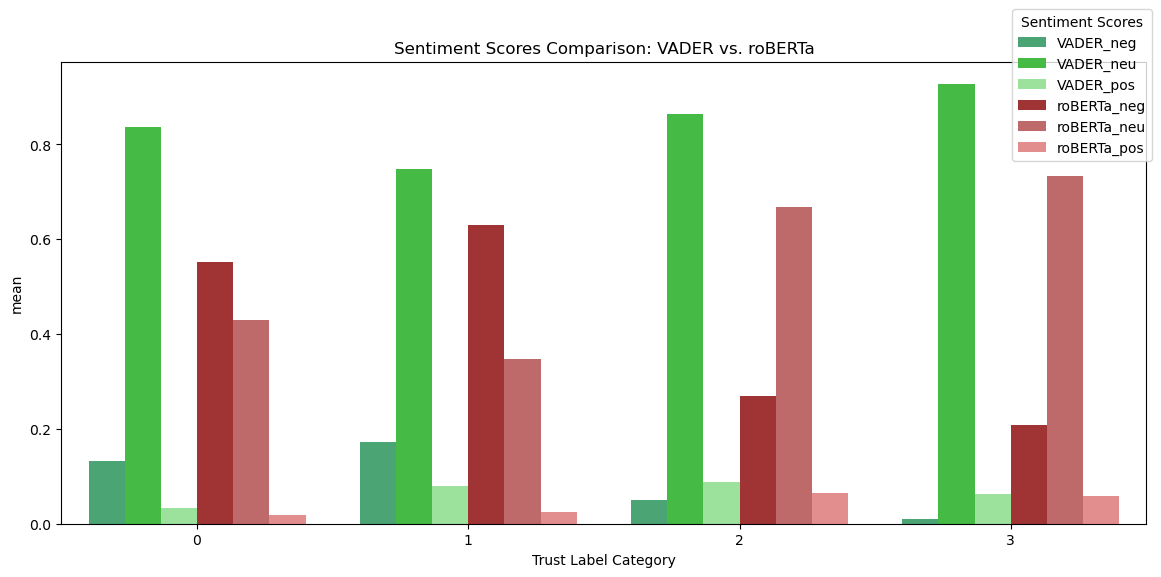

In [102]:
# Make a table that groups the data by label and calculate means for each SCORE like in Step 2.3
VADER_label_means = df_result.groupby('label').agg({'VADER_neg': 'mean', 'VADER_neu': 'mean', 'VADER_pos': 'mean'})
print(VADER_label_means)
roBERTa_label_means = df_result.groupby('label').agg({'roBERTa_neg': 'mean', 'roBERTa_neu': 'mean', 'roBERTa_pos': 'mean'})
print(roBERTa_label_means)

# Combine label means into a single df like in Step 1.2
combined_means = pd.concat([VADER_label_means, roBERTa_label_means], axis=1)

# Reset the index to have the trust label as a column in the df
combined_means.reset_index(inplace=True)

# Transforming the df to a long format to make it suitable for bar plot
long_combined_means = combined_means.melt(id_vars=['label'], var_name='sentiment', value_name='mean')

# Customize color scheme for the variables using matplotlib - https://matplotlib.org/stable/gallery/color/named_colors.html
custom_colors = {
    'VADER_neg': 'mediumseagreen',
    'VADER_neu': 'limegreen',
    'VADER_pos': 'lightgreen',
    'roBERTa_neg': 'firebrick',
    'roBERTa_neu': 'indianred',
    'roBERTa_pos': 'lightcoral'
}

# Create a bar chart similar to the one in Step 2.3
fig, ax = plt.subplots(figsize=(14, 6))
sns.barplot(
    data = long_combined_means,
    x ='label',
    y ='mean',
    hue ='sentiment',
    palette = custom_colors,
    ax = ax
)
ax.set_xlabel('Trust Label Category')
ax.set_title('Sentiment Scores Comparison: VADER vs. roBERTa')
plt.legend(loc='center left', bbox_to_anchor=(0.87, 0.95), title='Sentiment Scores') #Adjust legend position

plt.show()


In [106]:
# Alternativly, a scatter plot matrix can be used, looking at the relationship between the scores of the models.

import plotly.express as px # Library used to make the scatter matrix

fig = px.scatter_matrix(
    df_result,
    dimensions=['VADER_neg', 'VADER_neu', 'VADER_pos', 'roBERTa_neg', 'roBERTa_neu', 'roBERTa_pos'], #Specify x and y axes
    color = 'label',
    title="Scatterplot Matrix of VADER and roBERTa Sentiment Scores"
)

fig.update_traces(marker=dict(size=4)) # Change the size of the data points
#Change the size and dimensions of the scatter matrix
fig.update_layout(
    autosize=False,
    width=1000,
    height=1200,
)
fig.show()
# Showcases all possible combinations for the models 

In [115]:
# Perform a correlation test by using Pearson's correlation coefficient to find a correlation label and the sentiment models.
from scipy.stats import pearsonr

# Create new df with the sentiment models scores and label
vader_df = df_result[['VADER_neg', 'VADER_neu', 'VADER_pos', 'label']]
roberta_df = df_result[['roBERTa_neg', 'roBERTa_neu', 'roBERTa_pos', 'label']]

# Calculate the correlation coefficient for label
for col in vader_df.columns[:-1]:
    corr_coef, p_val = pearsonr(vader_df[col], vader_df['label'])
    print(f"Correlation between label and {col}: {corr_coef}")
    
for col in roberta_df.columns[:-1]:
    corr_coef, p_val = pearsonr(roberta_df[col], roberta_df['label'])
    print(f"Correlation between label and {col}: {corr_coef}")

Correlation between label and VADER_neg: -0.26384716520275464
Correlation between label and VADER_neu: 0.11250038796692681
Correlation between label and VADER_pos: 0.11573276664463648
Correlation between label and roBERTa_neg: -0.48012958406153855
Correlation between label and roBERTa_neu: 0.4424176881885811
Correlation between label and roBERTa_pos: 0.18333325718086002


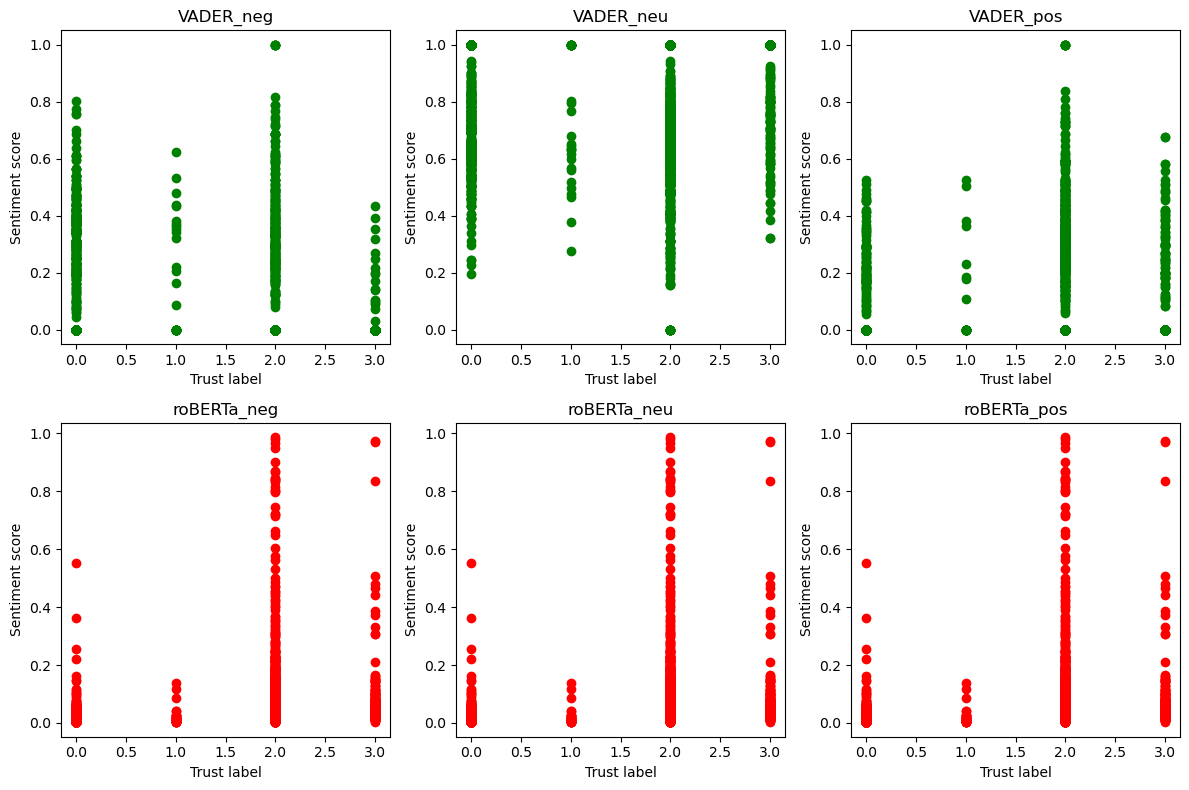

In [124]:
# Alternativly, we can make subplots in form of scatterplots to see if there is a trend between the label and the sentiment scores
fig, axs = plt.subplots(2, 3, figsize=(12, 8)) 
axs = axs.ravel() 

# Make scatter plots for the sentiment scores - VADER and roBERTa
for index, x in enumerate(['VADER_neg', 'VADER_neu', 'VADER_pos']):
    axs[index].scatter(df_result['label'], df_result[x], color='green')
    axs[index].set_title(x)
    axs[index].set_xlabel('Trust label')
    axs[index].set_ylabel('Sentiment score')

for index, x in enumerate(['roBERTa_neg', 'roBERTa_neu', 'roBERTa_pos']):
    axs[index+3].scatter(df_result['label'], df_result[col], color='red')
    axs[index+3].set_title(x)
    axs[index+3].set_xlabel('Trust label')
    axs[index+3].set_ylabel('Sentiment score')

plt.tight_layout()
plt.show()


**Key insights from Step 3**

Interpreting the sentiment analysis from the calculations:

    Trust label 0 (Low Institutional Trust): 
        Negative - roBERTa > VADER
        Neutral - roBERTa < VADER
        Positive - roBERTa < VADER

    Trust label 1 (Low Agent Trust):
        Negative - roBERTa > VADER
        Neutral - roBERTa < VADER
        Positive - roBERTa < VADER

    Trust label 2 (Neutral):
        Negative - roBERTa > VADER
        Neutral - roBERTa < VADER
        Positive - roBERTa < VADER
        
    Trust label 3 (High trust):
        Negative - roBERTa > VADER
        Neutral - roBERTa < VADER
        Positive - roBERTa < VADER
        
Overall the VADER model has a higher score for neutral and positive sentiment compared to roBERTa and roBERTa has a higher negative score compared to VADER. Most of the sentiment in VADER is saturated around neutral sentiment while the roBERTa sentiment is more dispersed. 

This text analysis indicate that most of the text in the Human-chatbot conversations about COVID-19 had a neutral sentiment. 
The correlation test indicate that the roBERTA model has a stronger correlation to the trust labels than the VADER model, especially for the negative sentiment but overall the correlations are on the weaker side.

# THE END